In [105]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

HourlyWidgetProduction=α+β1WorkerAgeFrom18+β2WorkerYearsinJob+β3IsRoundWidget

In [106]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


### Assumption one: linear relationship¶

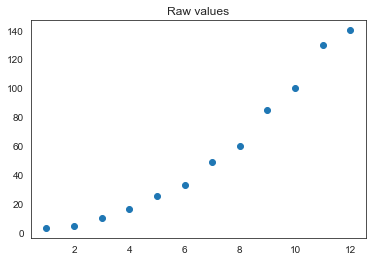

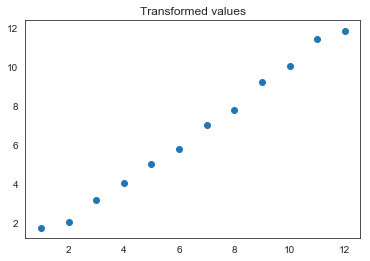

In [107]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

### Assumption two: multivariate normality

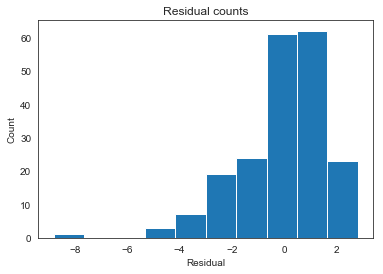

In [108]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption three: homoscedasticity


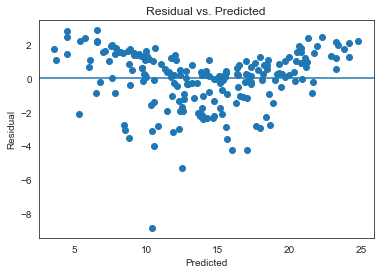

In [109]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [110]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


### Drill: fixing assumptions

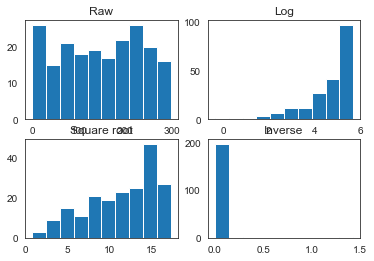

In [111]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['TV'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(data['TV'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['TV'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/data['TV'].dropna())
plt.title('Inverse')
plt.show()

data['TV'] = (np.sqrt(data['TV'].dropna()))

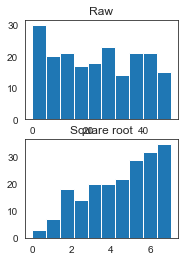

In [112]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['Radio'].dropna())
plt.title('Raw')

#fig.add_subplot(222)
#plt.hist(np.log(data['Radio'].dropna()))
#plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['Radio'].dropna()))
plt.title('Square root')

#ax3=fig.add_subplot(224)
#plt.hist(1/data['Radio'].dropna())
#plt.title('Inverse')
#plt.show()

data['Radio'] = (np.sqrt(data['Radio'].dropna()))

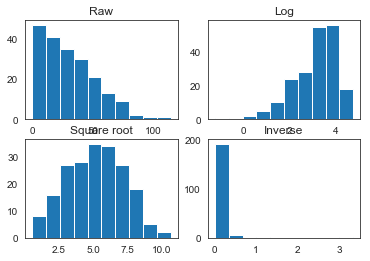

In [113]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['Newspaper'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(data['Newspaper'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['Newspaper'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/data['Newspaper'].dropna())
plt.title('Inverse')
plt.show()

data['Newspaper'] = (np.sqrt(data['Newspaper'].dropna()))

            Unnamed: 0    TV  Radio  Newspaper  Sales
Unnamed: 0       1.000 0.015 -0.115     -0.147 -0.052
TV               0.015 1.000  0.040      0.042  0.789
Radio           -0.115 0.040  1.000      0.294  0.565
Newspaper       -0.147 0.042  0.294      1.000  0.205
Sales           -0.052 0.789  0.565      0.205  1.000


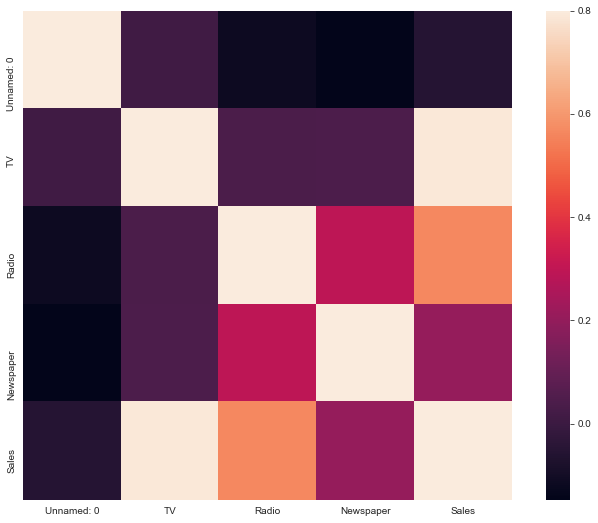

In [114]:
corrmat = data.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [115]:
#give PCA a go for TV and Sales data
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

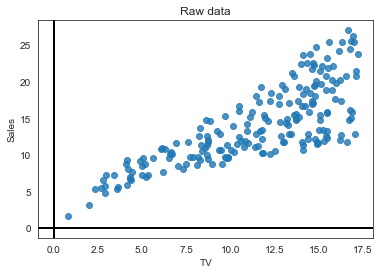

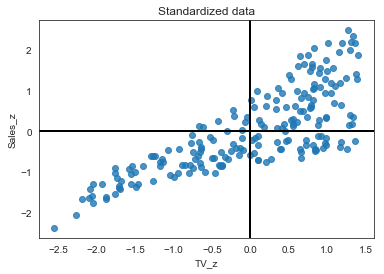

In [116]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

t = sns.regplot(
    'TV',
    'Sales',
    data,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
data['TV_z'] = (data['TV'] - data['TV'].mean()) / data['TV'].std()
data['Sales_z'] = (data['Sales'] - data['Sales'].mean()) / data['Sales'].std()

t = sns.regplot(
    'TV_z',
    'Sales_z',
    data,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()



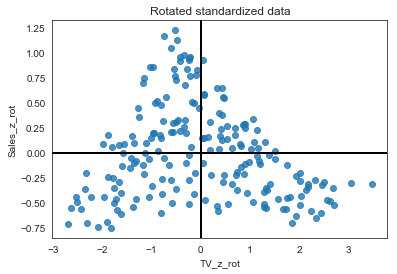

In [117]:
# Rotating the data so that the axes roughly match to vector above.
data['TV_z_rot'] = math.cos(40) * data['TV_z'] - math.sin(40) * data['Sales_z']
data['Sales_z_rot'] = math.sin(40) * data['TV_z'] + math.cos(40) * data['Sales_z']

t = sns.regplot(
    'TV_z_rot',
    'Sales_z_rot',
    data,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [118]:
X_new = StandardScaler().fit_transform(data[['TV', 'Radio','Newspaper']])

In [119]:
X_newt = X_new.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[7370.94989322   69.86249246  105.91945226]
 [  69.86249246  220.42774271  114.49697889]
 [ 105.91945226  114.49697889  474.30832563]]


In [120]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[0.99982947]
 [0.01001377]
 [0.01551648]]
Eigenvalue 1: 7373.2933765961
----------------------------------------
Eigenvector 2: 
[[ 0.01807077]
 [-0.35736234]
 [-0.93379098]]
Eigenvalue 2: 516.0766259540637
----------------------------------------
Eigenvector 3: 
[[ 0.00380577]
 [-0.93391214]
 [ 0.35748236]]
Eigenvalue 3: 176.31595900762673
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.91415577 0.06398422 0.02186001]


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


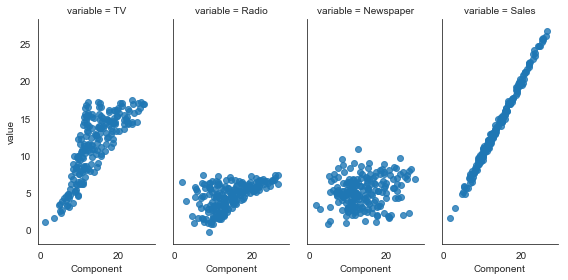

In [121]:
data_to_plot = data[['TV', 'Radio', 'Newspaper', 'Sales']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.91415577 0.06398422]


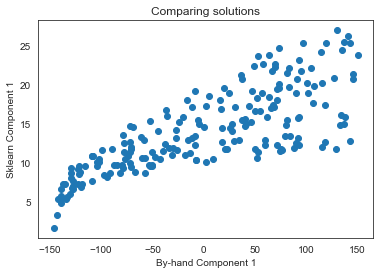

In [122]:
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [123]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X_new, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_new, Y))


Coefficients: 
 [[3.99359912 2.75540216 0.08955458]]

Intercept: 
 [14.0225]

R-squared:
0.9083730830119968
